# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [101]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 
df = pd.read_csv('IMDB-Movie-Data.csv')
# get reaquainted with the data by viewing the first 5 rows

In [2]:
# list the column names
df.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [102]:
# preview the contents of the 'Genre' column only
df.Genre

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [103]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts
genre_counts = df.Genre.value_counts()
print(genre_counts)

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64


In [104]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions
genre_proportions = genre_counts/genre_counts.sum()
print(genre_proportions)

Action,Adventure,Sci-Fi    0.050
Drama                      0.048
Comedy,Drama,Romance       0.035
Comedy                     0.032
Drama,Romance              0.031
                           ...  
Action,Comedy,Family       0.001
Action,Crime,Fantasy       0.001
Comedy,Mystery             0.001
Adventure,Comedy,Horror    0.001
Comedy,Family,Fantasy      0.001
Name: Genre, Length: 207, dtype: float64


In [105]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
df['Genre'].isna().sum()


0

In [6]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 
df['Genre'].head(20)

0        Action,Adventure,Sci-Fi
1       Adventure,Mystery,Sci-Fi
2                Horror,Thriller
3        Animation,Comedy,Family
4       Action,Adventure,Fantasy
5       Action,Adventure,Fantasy
6             Comedy,Drama,Music
7                         Comedy
8     Action,Adventure,Biography
9        Adventure,Drama,Romance
10      Adventure,Family,Fantasy
11       Biography,Drama,History
12       Action,Adventure,Sci-Fi
13    Animation,Adventure,Comedy
14           Action,Comedy,Drama
15    Animation,Adventure,Comedy
16       Biography,Drama,History
17               Action,Thriller
18               Biography,Drama
19          Drama,Mystery,Sci-Fi
Name: Genre, dtype: object

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [107]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
df['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

Do we have any missing revenue entries? Yes, see output on next code cell.
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``? 
>>>No, it does not.the count excludes the missing values..

Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

In [108]:
df['Revenue (Millions)'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: Revenue (Millions), Length: 1000, dtype: bool

In [8]:
df['Revenue (Millions)'].isna().sum()

128

### 3. Make a plot distribution of the revenue data.


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

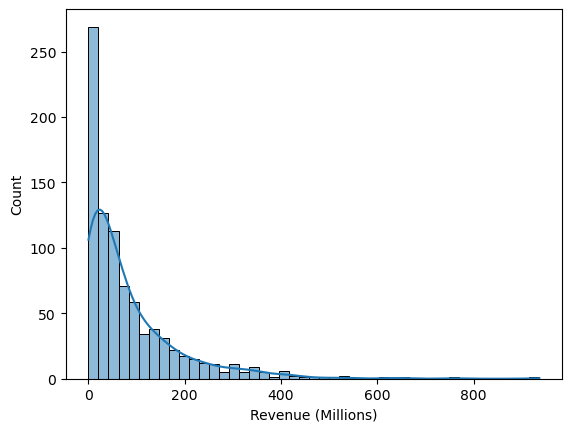

In [109]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.
sns.histplot(data=df ,  x='Revenue (Millions)', kde= True)

Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

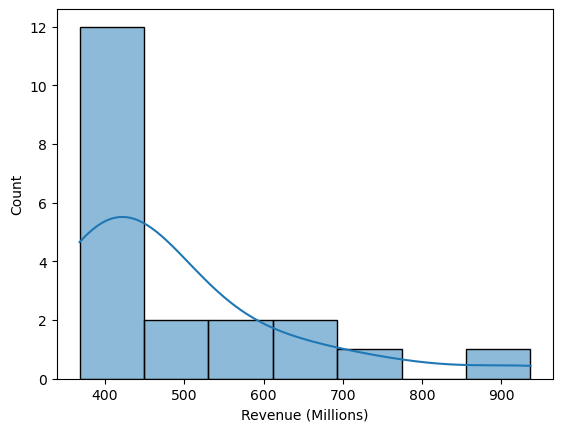

In [14]:
sns.histplot(data=df,  x=df['Revenue (Millions)'].nlargest(n=20), kde = True)

In [18]:
df['Revenue (Millions)'].nlargest(n=20).describe()

count     20.000000
mean     491.968500
std      147.732725
min      368.050000
25%      406.520000
50%      423.840000
75%      532.457500
max      936.630000
Name: Revenue (Millions), dtype: float64

### 4. Find the % of movies with a higher than avergage Rating

In [110]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.
mean_rating = df['Rating'].mean()
print(mean_rating)

6.723200000000003


In [26]:
# Find the dataset where a movie's rating is higher than mean_rating. 
# Divide that by the length of the total dataset.
len(df[df['Rating'] > mean_rating])/len(df)

0.513

### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [111]:
# run describe on the rating column
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

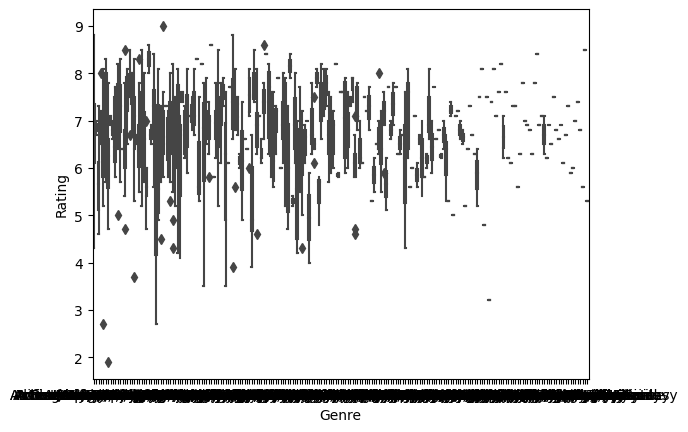

In [84]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots
df[['Genre', 'Rating']].groupby('Genre').value_counts()
sns.boxplot(x='Genre',  y='Rating', data=df)


That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret? A bit helpful and easier to read and interpret.
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

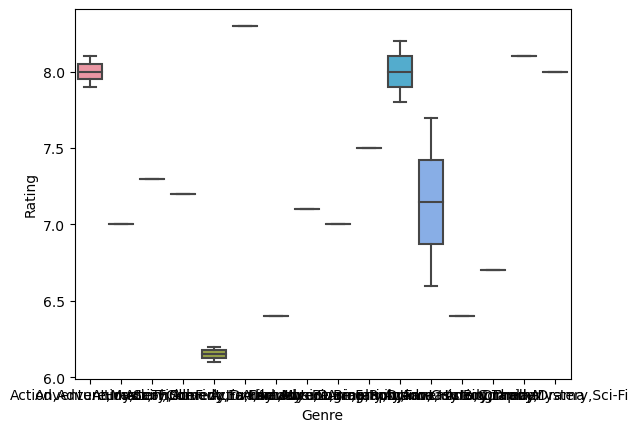

In [112]:
sns.boxplot(x=df['Genre'].head(20),  y=df['Rating'], data=df)

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

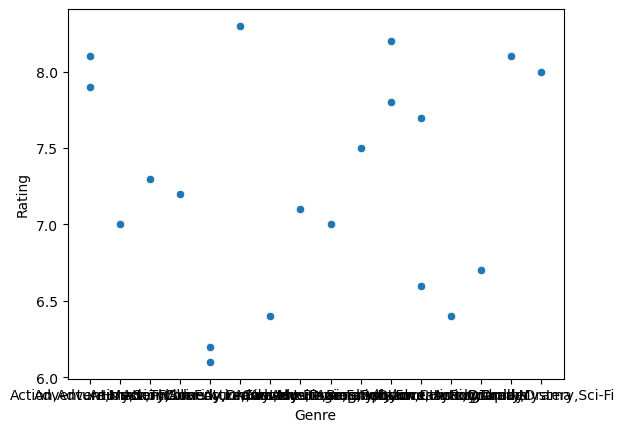

In [62]:
#sns.scatterplot(data = df, x = "Genre", y = "Rating")
sns.scatterplot(x= df['Genre'].head(20), y= df['Rating'])

### 6. Make a chart to show the number of films in each rating group each year

In [119]:
# Create a new column called rating_group
# Use to pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
bin=[1,2,3,4,5,6,7,8,9,10]
df['rating_group']=pd.cut(df.Rating, bin)
print(df.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'rating_group'],
      dtype='object')


In [120]:
df['rating_group']

0      (8, 9]
1      (6, 7]
2      (7, 8]
3      (7, 8]
4      (6, 7]
        ...  
995    (6, 7]
996    (5, 6]
997    (6, 7]
998    (5, 6]
999    (5, 6]
Name: rating_group, Length: 1000, dtype: category
Categories (9, interval[int64, right]): [(1, 2] < (2, 3] < (3, 4] < (4, 5] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

In [121]:
# Make a chart to show the number of films in each rating group per year
print(df.groupby('Year')['rating_group'].value_counts().unstack())
#sns.boxplot(x=df['rating_group'],  y=df['Year'], data=df)

      (1, 2]  (2, 3]  (3, 4]  (4, 5]  (5, 6]  (6, 7]  (7, 8]  (8, 9]  (9, 10]
Year                                                                         
2006       0       0       0       0       4      18      18       4        0
2007       0       0       0       1       4      11      32       5        0
2008       1       0       0       1       6      22      19       3        0
2009       0       1       0       1       7      16      21       5        0
2010       0       0       0       3       7      25      20       5        0
2011       0       0       0       2       8      25      24       4        0
2012       0       0       0       0       8      27      25       4        0
2013       0       0       0       3      10      42      32       4        0
2014       0       0       0       0      19      38      31      10        0
2015       0       0       1       6      22      56      36       6        0
2016       0       1       8      18      68     111      82    

Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above? = each year rating range 6,7 is the most concentrated except for years 2007,and 2009 which have range 7,8.

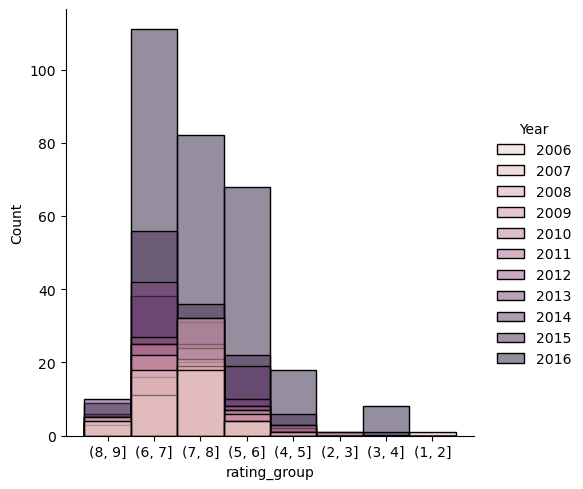

In [123]:
# Make a chart to show the number of films in each rating group per year - Note each count is read from the 0.
ax=sns.displot(df.groupby('Year')['rating_group'].value_counts().dropna().unstack(), x=df['rating_group'].astype(str), hue=df['Year'])

<AxesSubplot:xlabel='rating_group', ylabel='Year'>

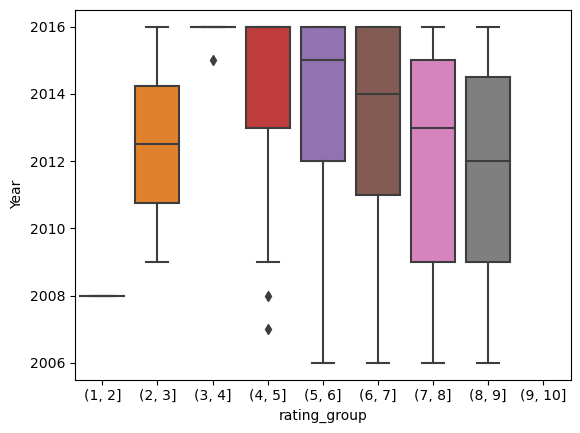

In [97]:
df[['Year', 'rating_group']].groupby('Year').value_counts()
sns.boxplot(x=df['rating_group'],  y=df['Year'], data=df)
